In [1]:
import pandas as pd
data=pd.read_csv('Downloads/Data science/Sales_data_zone_wise.csv')
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [2]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [3]:
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


# Casestudy Questions

XYZ Company has offices in four different zones. The company wishes to
investigate the following :

● The mean sales generated by each zone.

● Total sales generated by all the zones for each month.

● Check whether all the zones generate the same amount of sale

# ANSWERS

# To compare mean sales generated by each zone

H0: Means sales of all zones equal 

H1: Means sales of all zones are different

In [9]:
import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'], data['Zone - D'])
print("The fvalue is:",fvalue)
print("The pvalue is:", pvalue)

The fvalue is: 5.672056106843581
The pvalue is: 0.0011827601694503335


In [19]:
import scipy.stats
C=scipy.stats.f.ppf(1-0.05,3,84)
print("The fcritical value is:",C)

The fcritical value is: 2.713227129429893


In [23]:
# reshape the d dataframe suitable for statsmodels package 
data_melt = pd.melt(data.reset_index(), id_vars=['Month'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
data_melt.columns = ['month', 'zone', 'value']

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ zone', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
zone,1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


Results
1. pvalue<0.05

and

2. calculated value of f =5.672056
   
   critical value of f = 2.7132
   
   calculated value > critical value

Therfore we reject H0. So the mean sales of zones are different.

# Compare Total sales generated by all the zones for each month.

H0: Total sales generated by all zones for each month equal 

H1: Total sales generated by all zones for each month different

In [25]:
# reshape the d dataframe suitable for statsmodels package 
data_melt = pd.melt(data.reset_index(), id_vars=['Month'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
data_melt.columns = ['month', 'zone', 'value']

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ month+zone', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
month,2.444073e+12,28.0,1.002028,0.476823
zone,1.483058e+12,3.0,5.674932,0.001374
Residual,7.317376e+12,84.0,NaN,NaN


In [26]:
import scipy.stats
crit=scipy.stats.f.ppf(1-0.05,28,84)
print("The critical value of f for month is:",crit)

The critical value of f for month is: 1.6104146193885325


Results
1. pvalue=0.4768
   pvalue>0.05

and

2. calculated value of f =1.002028
   
   critical value of f = 1.610414 
   
   calculated value < critical value

Therfore  we accept H0. So the total sales generated by all zones for each month are same.

# Check whether all the zones generate the same amount of sales.


H0: Amount of sales of all zones equal

H1: Amount of sales of all zones are different

In [30]:
# reshape the d dataframe suitable for statsmodels package 
data_melt = pd.melt(data.reset_index(), id_vars=['Month'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
data_melt.columns = ['month', 'zone', 'value']

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ month+zone', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
month,2.444073e+12,28.0,1.002028,0.476823
zone,1.483058e+12,3.0,5.674932,0.001374
Residual,7.317376e+12,84.0,NaN,NaN


In [29]:
import scipy.stats
C=scipy.stats.f.ppf(1-0.05,3,84)
print("The fcritical value is:",C)

The fcritical value is: 2.713227129429893


Results

1. pvalue=0.01374
   pvalue<0.05
and

2. calculated value of f =5.672056

   critical value of f = 2.7132

   calculated value > critical value

Therfore we reject H0. So the amount of sales of all zones are different.

<AxesSubplot:>

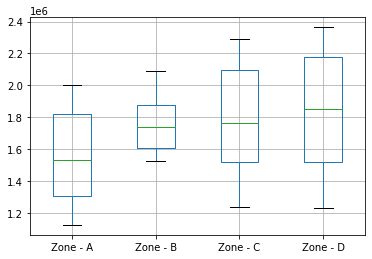

In [12]:
data.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'])

From this box plot it is clear that there is variation in amount of sales for each zone. For each zone the amount of sales are different. Its mean value also shows difference.